<a href="https://colab.research.google.com/github/ydad69/Healthcare-Resource-Demand-Prediction-and-Patient-Segmentation/blob/main/AI_Project_Group4_(insurance_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV




from sklearn import preprocessing
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE


# **Data Exploration and Preprocessing**

In [ ]:
data_path = 'insurance.csv'
data = pd.read_csv(data_path)

In [ ]:
data.head(50)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.shape

(1338, 7)

In [ ]:
print(data['charges'].max())
print(data['charges'].min())

63770.42801
1121.8739


In [ ]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000,55000,60000,65000, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14]

# Use pd.cut to bin the values
data['charges class'] = pd.cut(data['charges'], bins=bins, labels=labels)
data['charges class'] = data['charges class'].astype(int)
data.head(10)

,age,sex,bmi,children,smoker,region,charges,charges class
0,19,female,27.900,0,yes,southwest,16884.92400,4
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,5
4,32,male,28.880,0,no,northwest,3866.85520,1
5,31,female,25.740,0,no,southeast,3756.62160,1
6,46,female,33.440,1,no,southeast,8240.58960,2
7,37,female,27.740,3,no,northwest,7281.50560,2
8,37,male,29.830,2,no,northeast,6406.41070,2
9,60,female,25.840,0,no,northwest,28923.13692,6


In [ ]:
data.value_counts('charges class')

charges class
1     359
2     353
3     268
4      85
5      72
8      54
9      41
6      39
10     31
7      29
13      3
11      2
12      2
Name: count, dtype: int64

In [ ]:
cat_data=data.select_dtypes(include='object')
num_data=data.select_dtypes(exclude='object')
print("categorical features: ", cat_data.columns.to_list())
print("numerical features: ", num_data.columns.to_list())

categorical features:  ['sex', 'smoker', 'region']
numerical features:  ['age', 'bmi', 'children', 'charges', 'charges class']


<Axes: xlabel='count', ylabel='sex'>

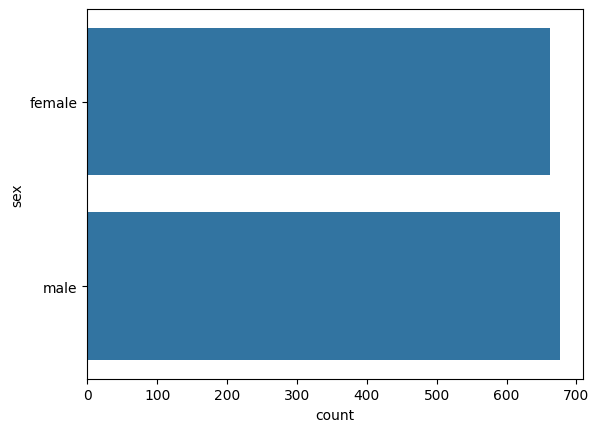

In [ ]:
sns.countplot(data['sex'])

<Axes: xlabel='count', ylabel='region'>

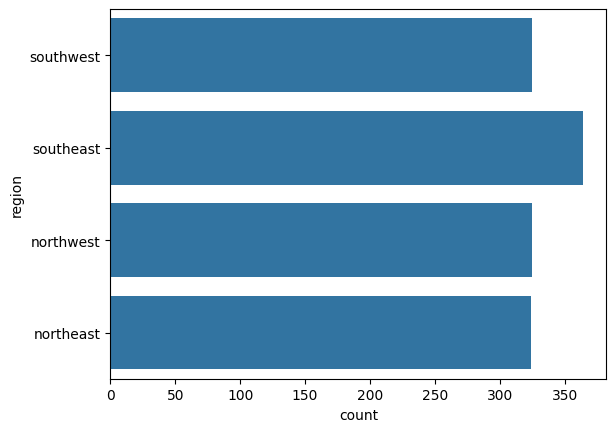

In [ ]:
sns.countplot(data['region'])

<Axes: xlabel='count', ylabel='smoker'>

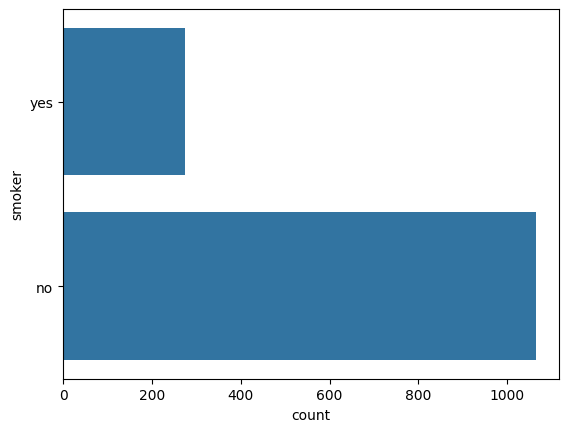

In [ ]:
sns.countplot(data['smoker'])

<Axes: xlabel='sex', ylabel='charges'>

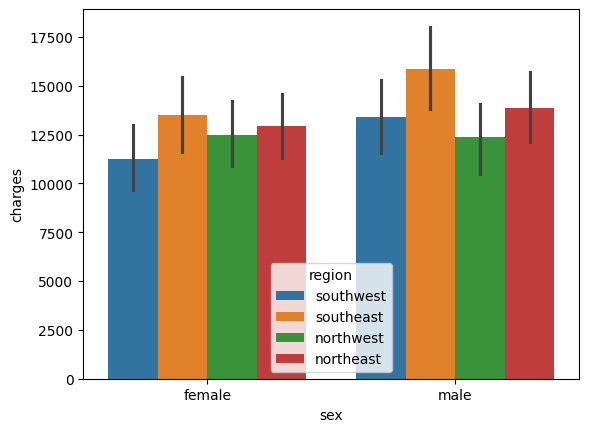

In [ ]:
sns.barplot(y=data['charges'],x=data['sex'],hue=data['region'])

<Axes: xlabel='smoker', ylabel='charges'>

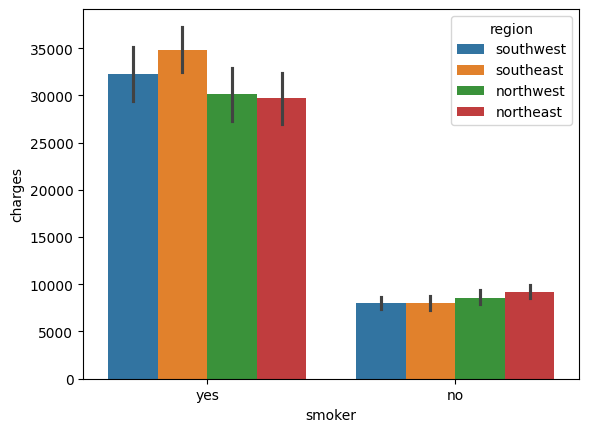

In [ ]:
sns.barplot(y=data['charges'],x=data['smoker'],hue=data['region'])

<ipython-input-528-6eda2fe45dce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_ranges,data=data,palette='plasma')


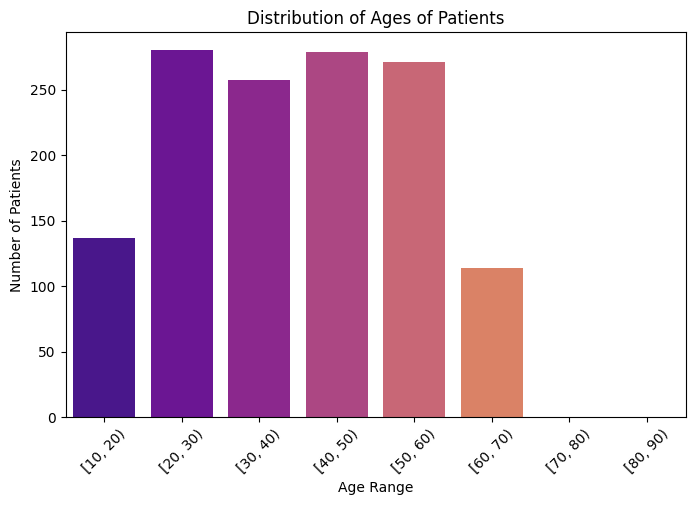

In [ ]:
age_ranges = pd.cut(data['age'], bins=range(10, 100, 10), right=False)
plt.figure(figsize=(8,5))
sns.countplot(x=age_ranges,data=data,palette='plasma')
plt.title('Distribution of Ages of Patients')
plt.xlabel('Age Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

In [ ]:
gender_smoker = data.groupby(['smoker','sex']).size().sort_values().unstack()
gender_smoker

sex,female,male
smoker,,
no,547,517
yes,115,159


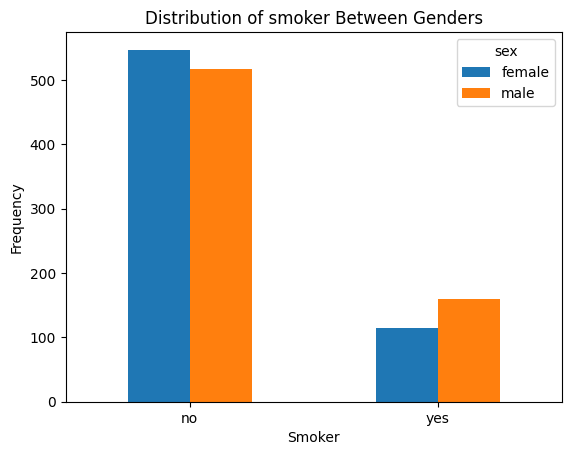

In [ ]:
gender_smoker.plot(kind = 'bar')
plt.title('Distribution of smoker Between Genders')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
gender_region = data.groupby(['region','sex']).size().sort_values().unstack()
gender_region

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


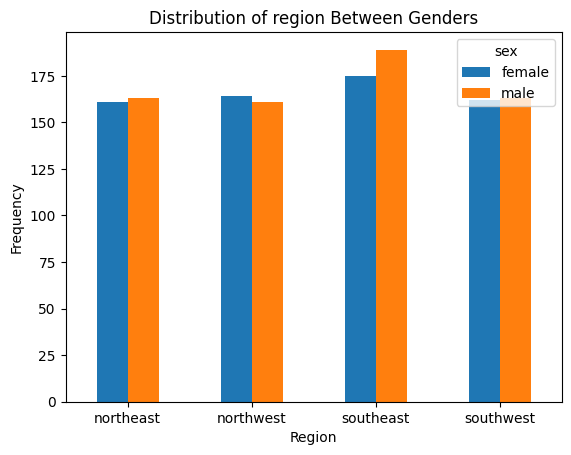

In [ ]:
gender_region.plot(kind = 'bar')
plt.title('Distribution of region Between Genders')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
smoker_region = data.groupby(['region','smoker']).size().sort_values().unstack()
smoker_region

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


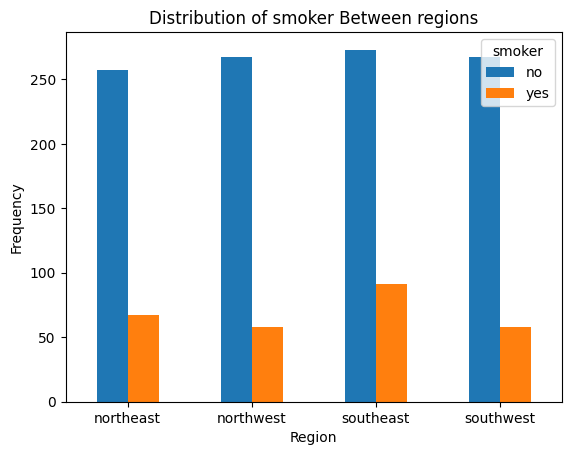

In [ ]:
smoker_region.plot(kind = 'bar')
plt.title('Distribution of smoker Between regions')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

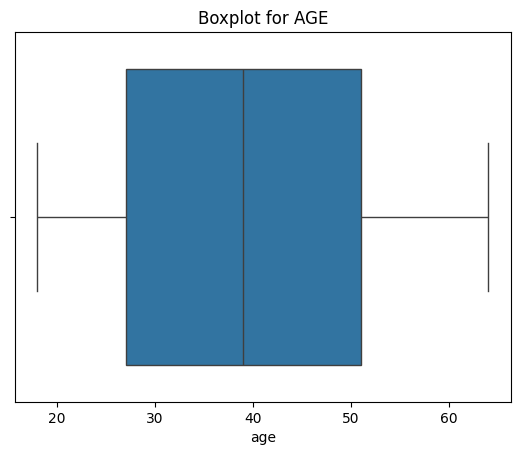

In [ ]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

sns.boxplot(x=data['age'])
plt.title('Boxplot for AGE')
plt.show()

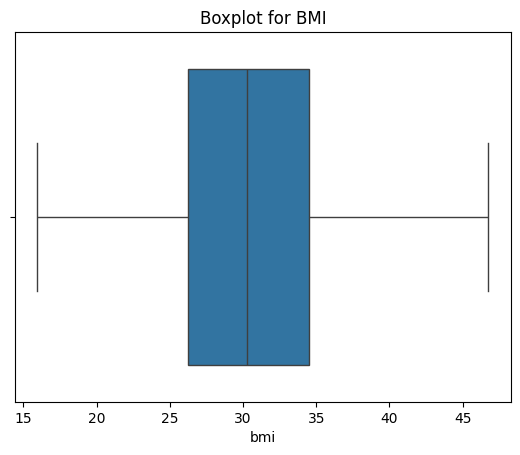

In [ ]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['bmi'] >= lower_bound) & (data['bmi'] <= upper_bound)]

sns.boxplot(x=data['bmi'])
plt.title('Boxplot for BMI')
plt.show()


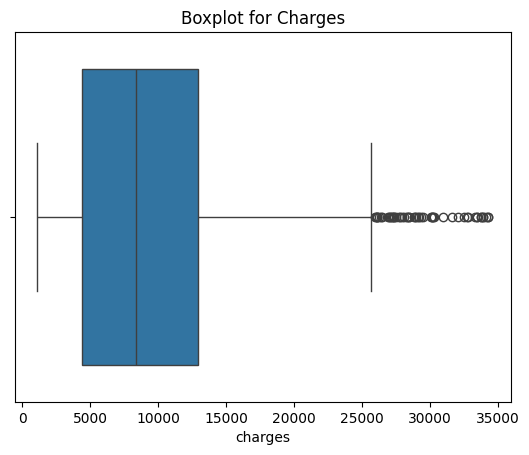

In [ ]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['charges'] >= lower_bound) & (data['charges'] <= upper_bound)]

sns.boxplot(x=data['charges'])
plt.title('Boxplot for Charges')
plt.show()

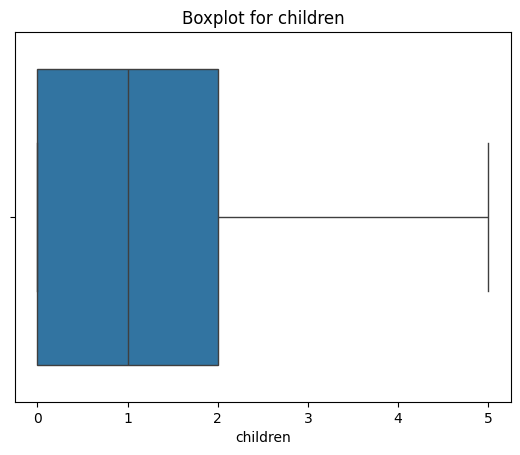

In [ ]:
Q1 = data['children'].quantile(0.25)
Q3 = data['children'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['children'] >= lower_bound) & (data['children'] <= upper_bound)]

sns.boxplot(x=data['children'])
plt.title('Boxplot for children')
plt.show()


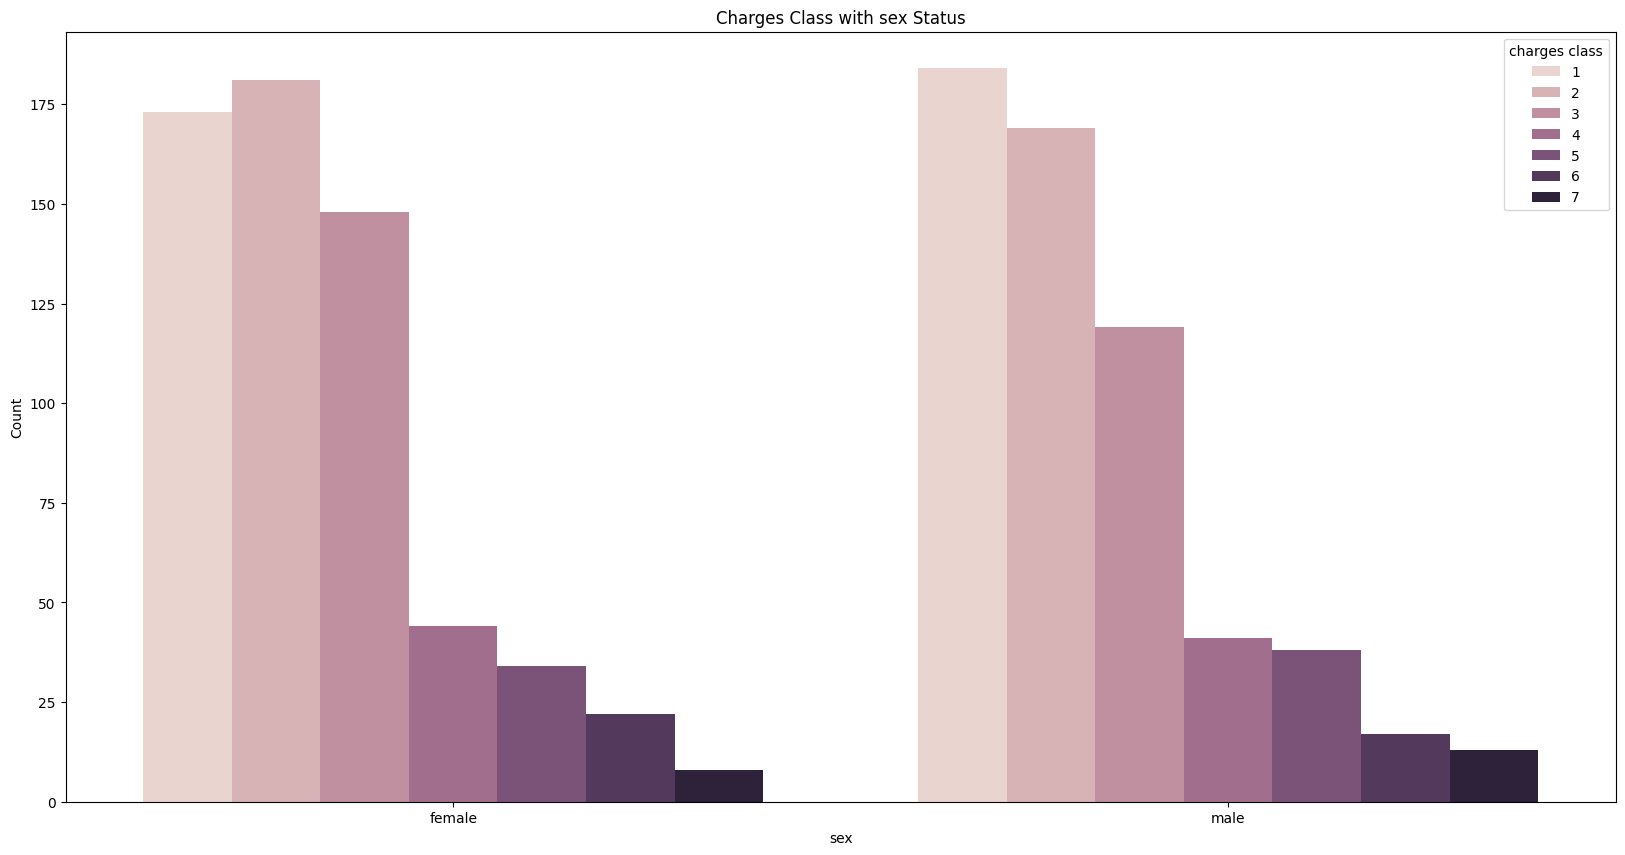

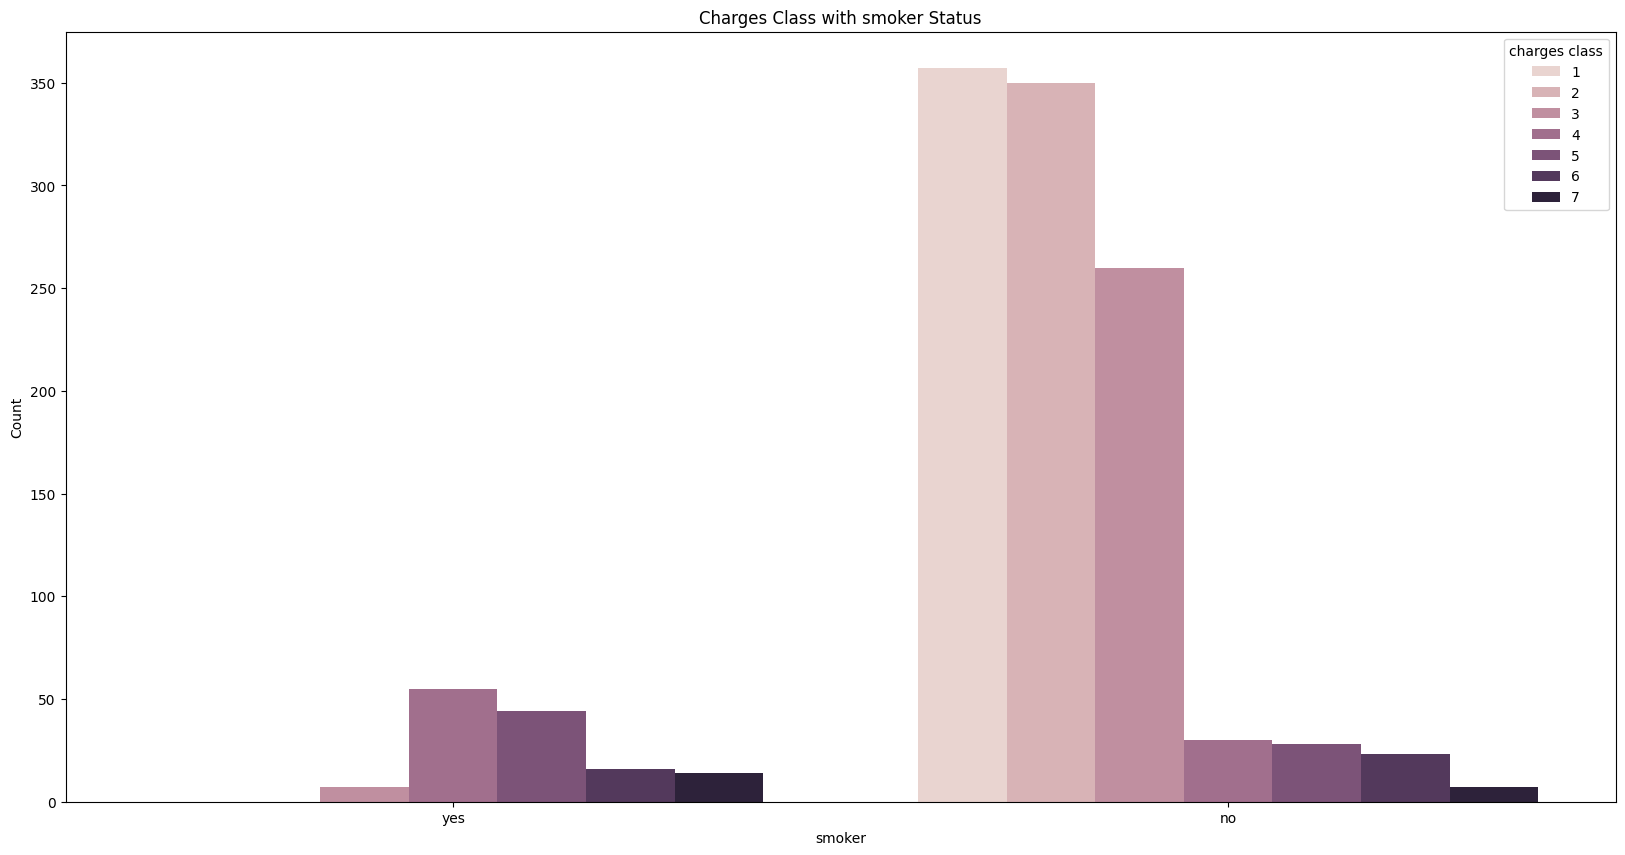

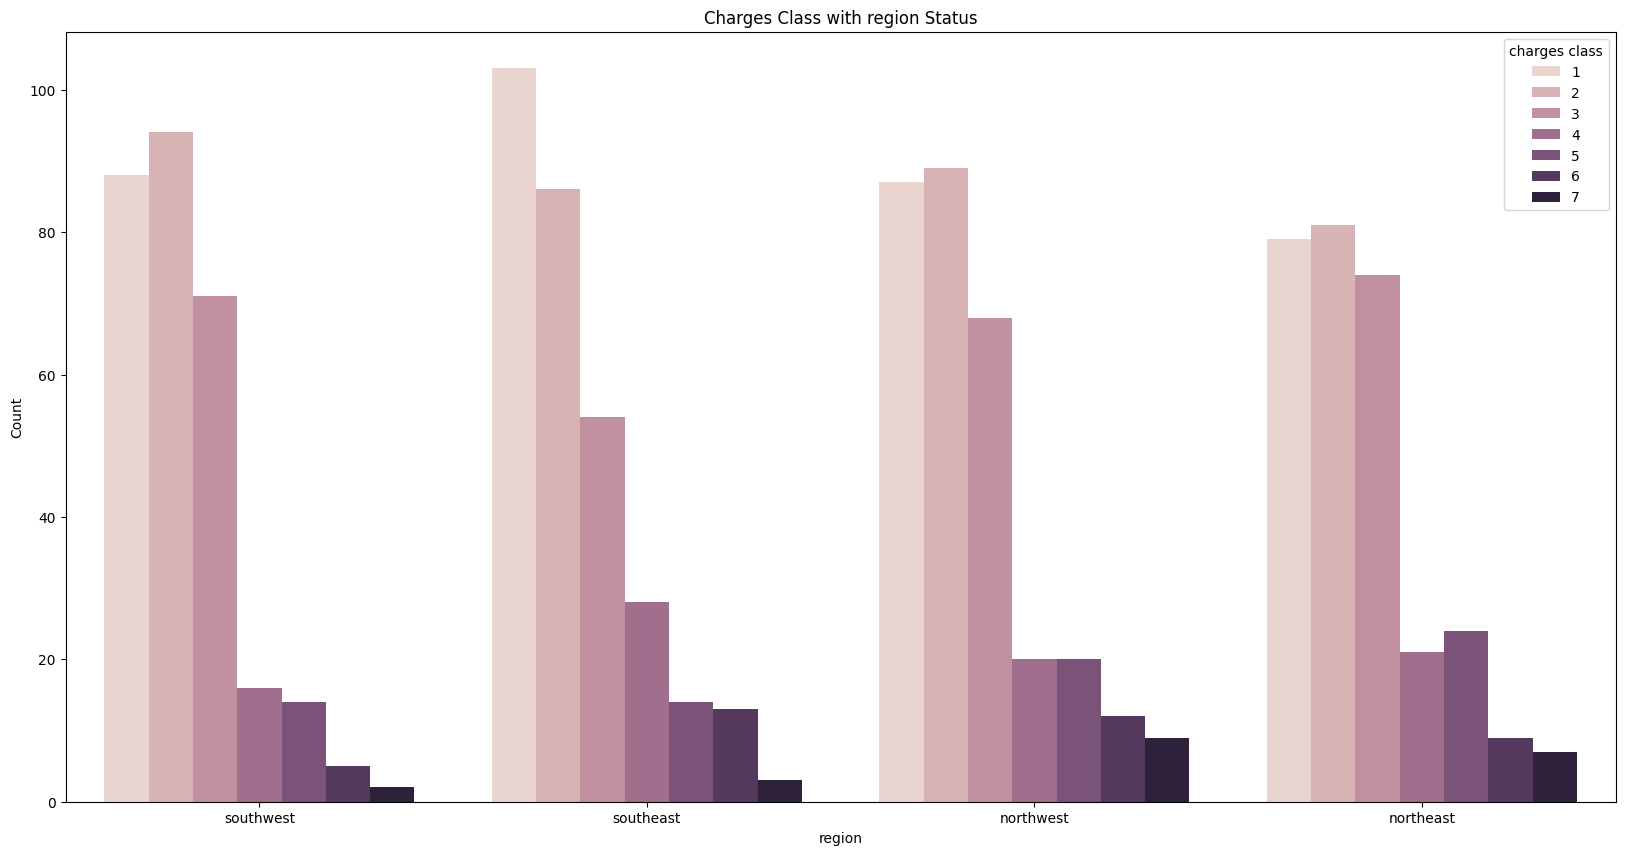

In [ ]:
for c in cat_data:
    plt.figure(figsize=(20,10))
    sns.countplot(x=c, hue='charges class', data=data)
    plt.title(f'Charges Class with {c} Status')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

In [ ]:
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges,charges class
0,19,0,27.900,0,1,3,16884.92400,4
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,5
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,3
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,1


In [ ]:
correlation_matrix = data.corr()

In [ ]:
correlation_matrix

,age,sex,bmi,children,smoker,region,charges,charges class
age,1.000000,-0.021440,0.123827,0.038179,-0.062095,0.006331,0.448798,0.442638
sex,-0.021440,1.000000,0.016487,0.015564,0.014027,-0.007363,-0.022893,-0.008948
bmi,0.123827,0.016487,1.000000,0.007546,-0.260657,0.152346,-0.064483,-0.060359
children,0.038179,0.015564,0.007546,1.000000,-0.001901,0.024153,0.089083,0.081187
smoker,-0.062095,0.014027,-0.260657,-0.001901,1.000000,-0.052118,0.596213,0.581937
region,0.006331,-0.007363,0.152346,0.024153,-0.052118,1.000000,-0.096537,-0.085638
charges,0.448798,-0.022893,-0.064483,0.089083,0.596213,-0.096537,1.000000,0.982274
charges class,0.442638,-0.008948,-0.060359,0.081187,0.581937,-0.085638,0.982274,1.000000


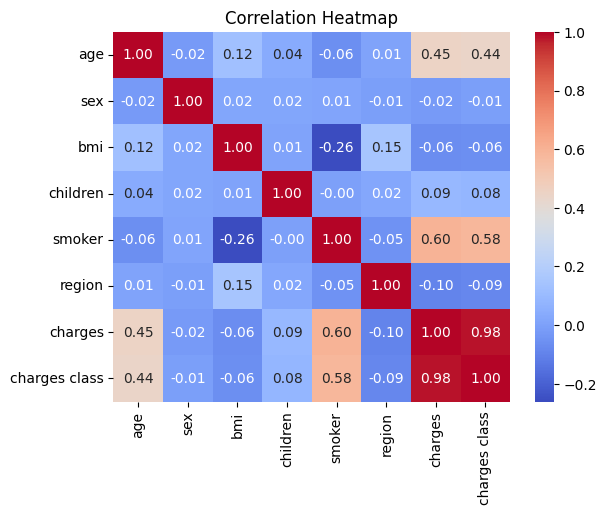

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import random
def predictValue(charge_class):
    if charge_class in labels:
        lower_bound = bins[charge_class - 1]
        upper_bound = bins[charge_class] - 1
        return random.randint(lower_bound, upper_bound)
    else:
        return "Invalid class input"

# **Training and Testing Models**

In [ ]:
colums_to_drop_now = ['charges','charges class']
X = data.drop(columns=colums_to_drop_now, axis=1)
y = data['charges class']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       4
1       1
2       1
3       5
4       1
       ..
1333    3
1334    1
1335    1
1336    1
1337    6
Name: charges class, Length: 1191, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Generate predictions
    predictions = model.predict(X_test)

    # Basic metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, predictions))

    # # Confusion matrix
    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(14, 12))  # Increase figure size
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.xticks(rotation=90, fontsize=8)  # Rotate x labels and adjust font size
    plt.yticks(rotation=0, fontsize=8)  # Adjust font size
    plt.tight_layout()  # Adjust layout to make room for label rotations
    plt.show()


    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)*100))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)*100))

    cross_val_scores = cross_val_score(model,X_train, y_train, cv=5)
    print("Cross-Validation Scores:", cross_val_scores*100)
    print("Mean Value:",np.mean(cross_val_scores)*100)

Random Forest Performance:
Accuracy: 0.8284518828451883, Precision: 0.7972308977572136, Recall: 0.6429813372717508, F1 Score: 0.6807911256595206

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.91      0.88        70
           2       0.85      0.95      0.90        64
           3       0.81      0.86      0.83        49
           4       0.95      0.67      0.78        27
           5       0.62      0.53      0.57        19
           6       0.50      0.33      0.40         6
           7       1.00      0.25      0.40         4

    accuracy                           0.83       239
   macro avg       0.80      0.64      0.68       239
weighted avg       0.83      0.83      0.82       239



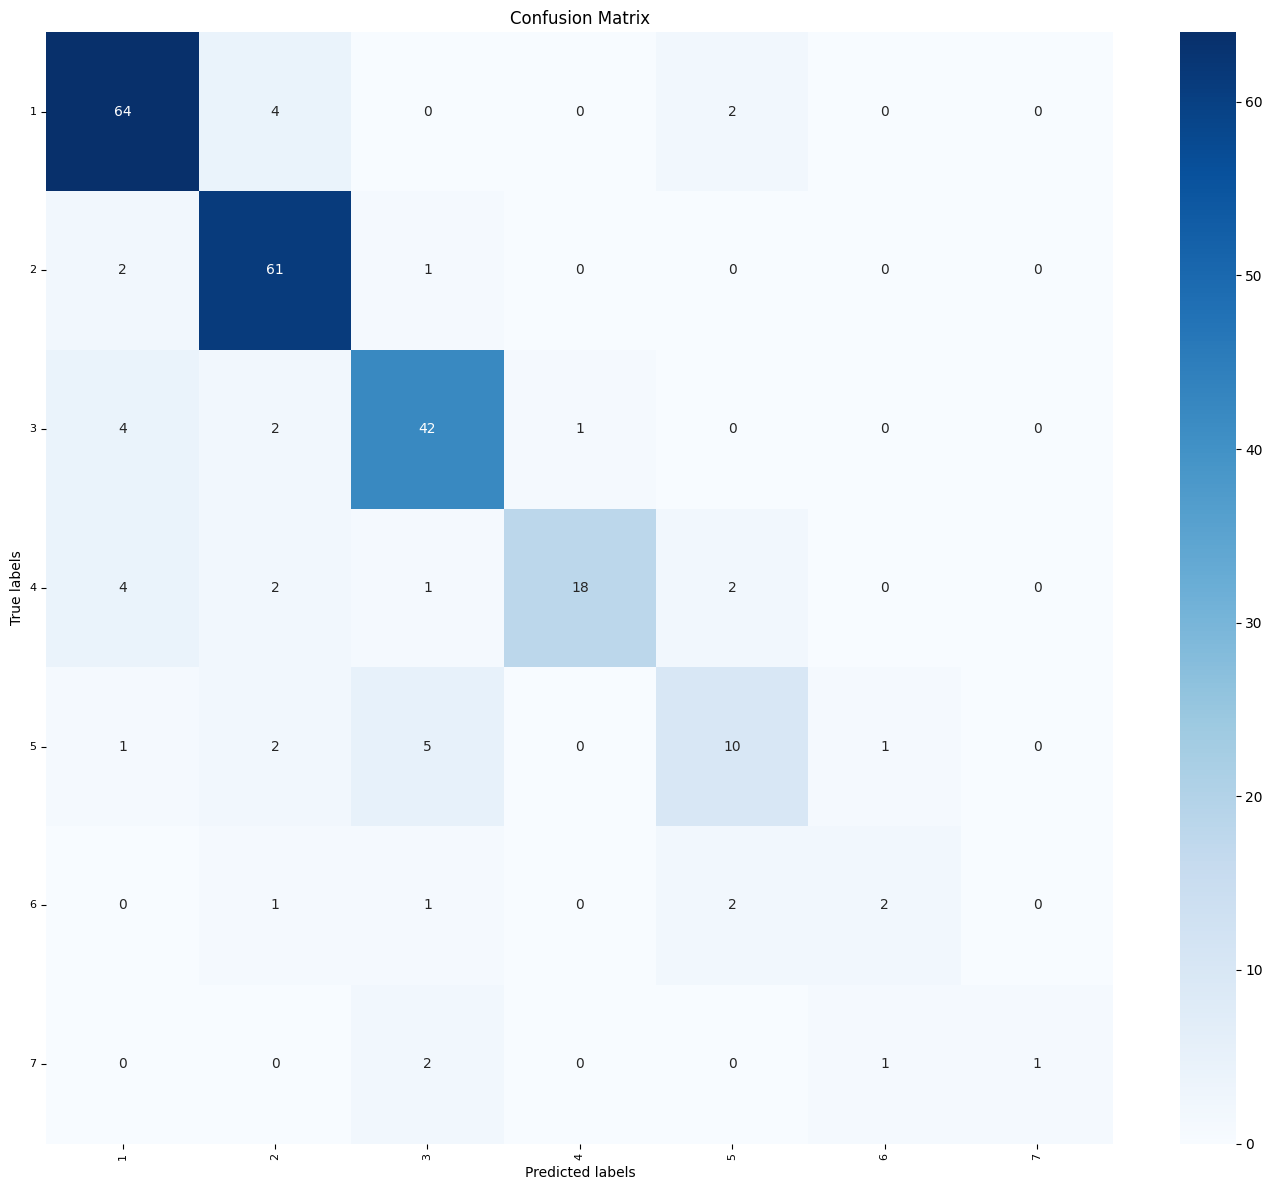

Training set score: 99.8950
Test set score: 82.8452
Cross-Validation Scores: [83.76963351 90.57591623 83.15789474 85.78947368 85.26315789]
Mean Value: 85.71121521080187


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Performance:")
evaluate_model(rf, X_test, y_test)

Gradient Boosting Performance:
Accuracy: 0.8117154811715481, Precision: 0.7764749735510643, Recall: 0.6461093386811702, F1 Score: 0.67505967268741

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.90      0.88        70
           2       0.84      0.95      0.89        64
           3       0.78      0.82      0.80        49
           4       0.81      0.63      0.71        27
           5       0.64      0.47      0.55        19
           6       0.50      0.50      0.50         6
           7       1.00      0.25      0.40         4

    accuracy                           0.81       239
   macro avg       0.78      0.65      0.68       239
weighted avg       0.81      0.81      0.80       239



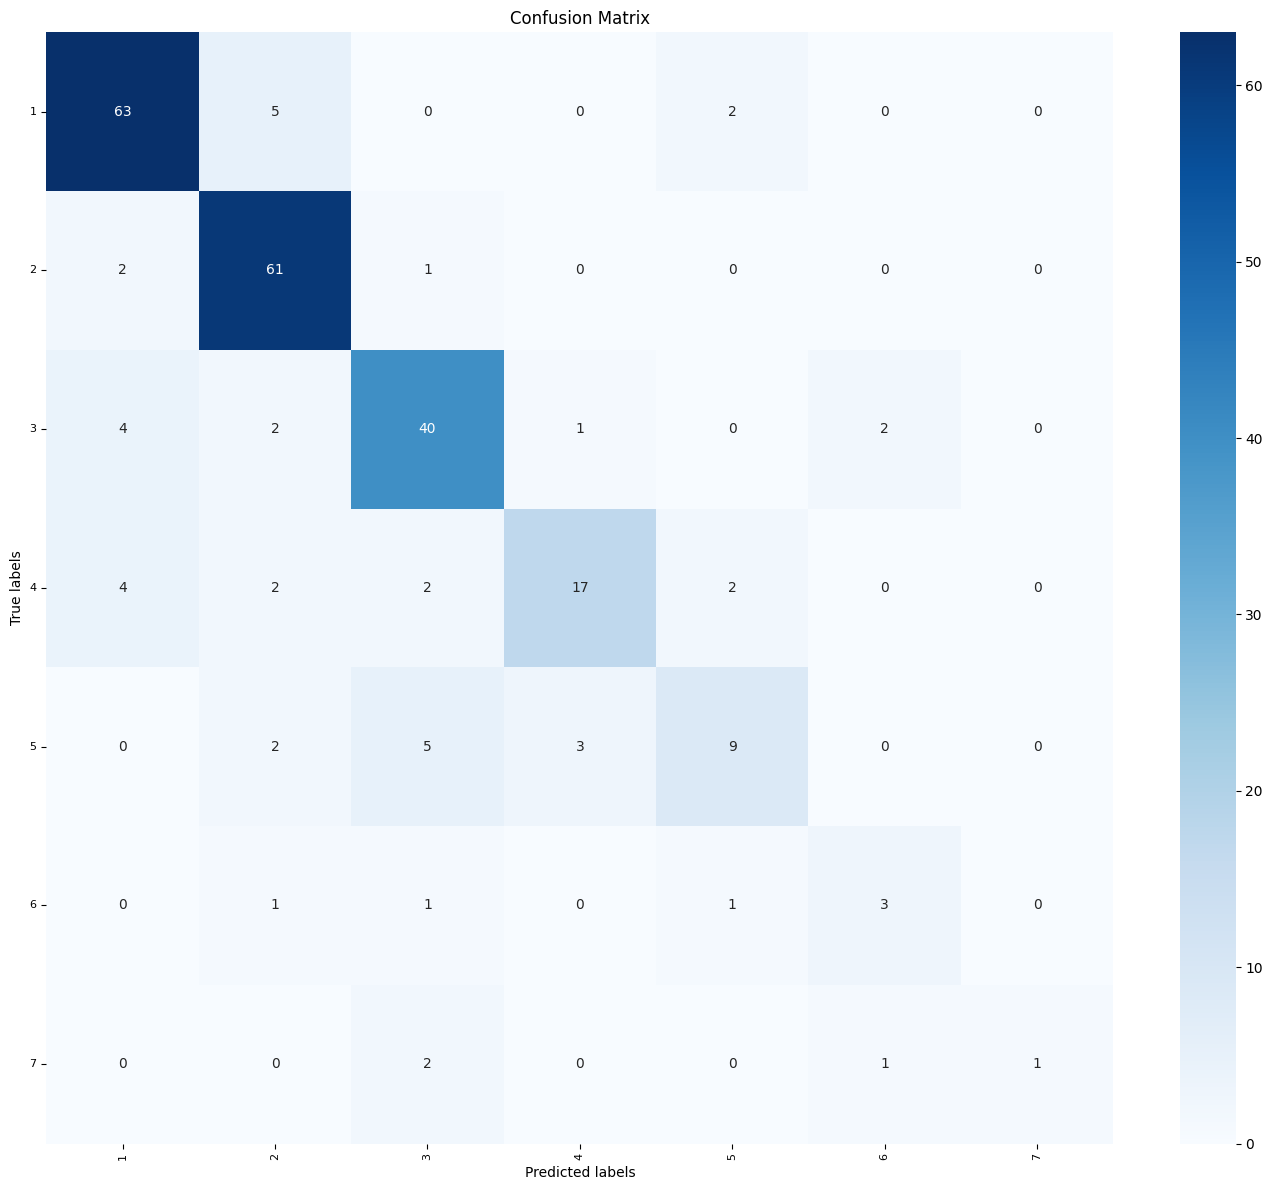

Training set score: 97.0588
Test set score: 81.1715
Cross-Validation Scores: [83.2460733  89.0052356  84.21052632 86.31578947 84.21052632]
Mean Value: 85.39763020115736


In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Performance:")
evaluate_model(gb, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Performance:
Accuracy: 0.6569037656903766, Precision: 0.5268326895874633, Recall: 0.4596516802209606, F1 Score: 0.4683315756486488

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.80      0.83        70
           2       0.61      0.75      0.67        64
           3       0.58      0.69      0.63        49
           4       0.90      0.33      0.49        27
           5       0.41      0.47      0.44        19
           6       0.33      0.17      0.22         6
           7       0.00      0.00      0.00         4

    accuracy                           0.66       239
   macro avg       0.53      0.46      0.47       239
weighted avg       0.68      0.66      0.65       239



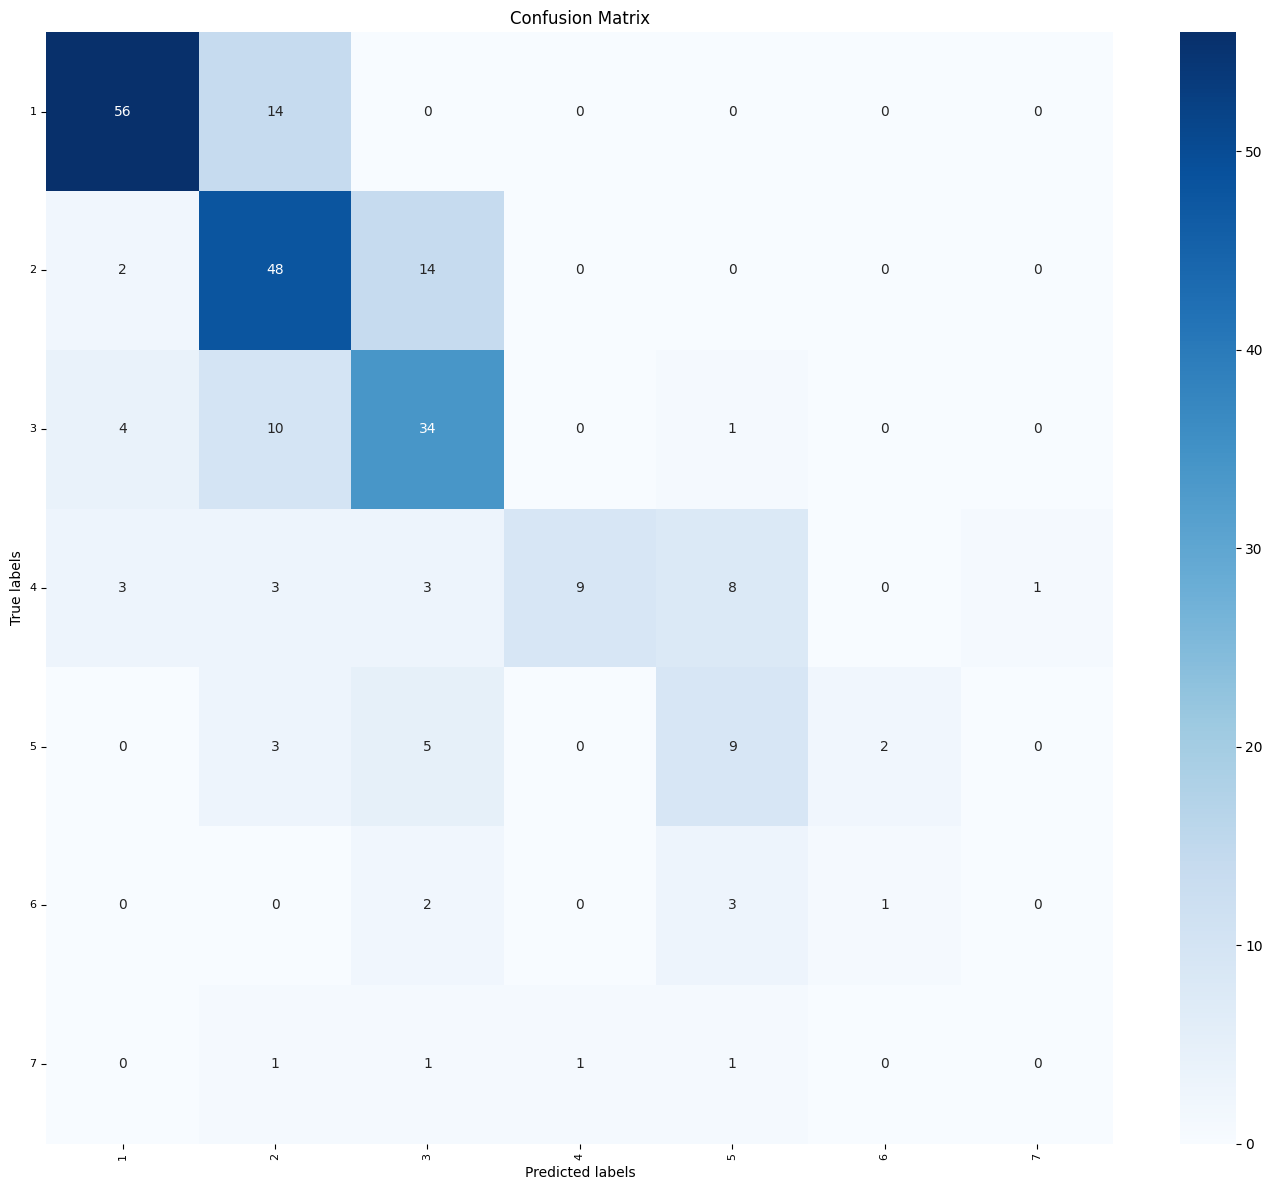

Training set score: 72.5840
Test set score: 65.6904


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [68.06282723 71.20418848 64.21052632 74.21052632 70.52631579]
Mean Value: 69.64287682557179


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)
print("Neural Network Performance:")
evaluate_model(nn, X_test, y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.5737400545461205
Root Mean Squared Error: 0.8937019167476201
R-squared: 0.6321045021454488


# **Training and Testing Model using Standard Scaling**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-1.42419028, -0.97594007, -0.35678354, -0.89421974,  2.7852025 ,
         1.35842485],
       [-1.49536095,  1.02465308,  0.64353704, -0.07181379, -0.35904032,
         0.45759857],
       [-0.78365423,  1.02465308,  0.51231952,  1.57299812, -0.35904032,
         0.45759857],
       ...,
       [-1.49536095, -0.97594007,  1.16840713, -0.89421974, -0.35904032,
         0.45759857],
       [-1.28184894, -0.97594007, -0.71464951, -0.89421974, -0.35904032,
         1.35842485],
       [ 1.56497794, -0.97594007, -0.15740107, -0.89421974,  2.7852025 ,
        -0.44322771]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

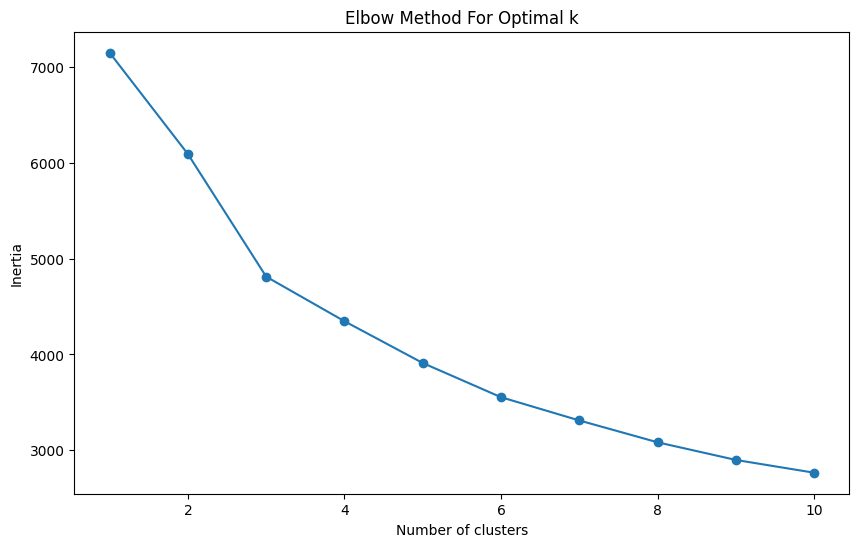

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


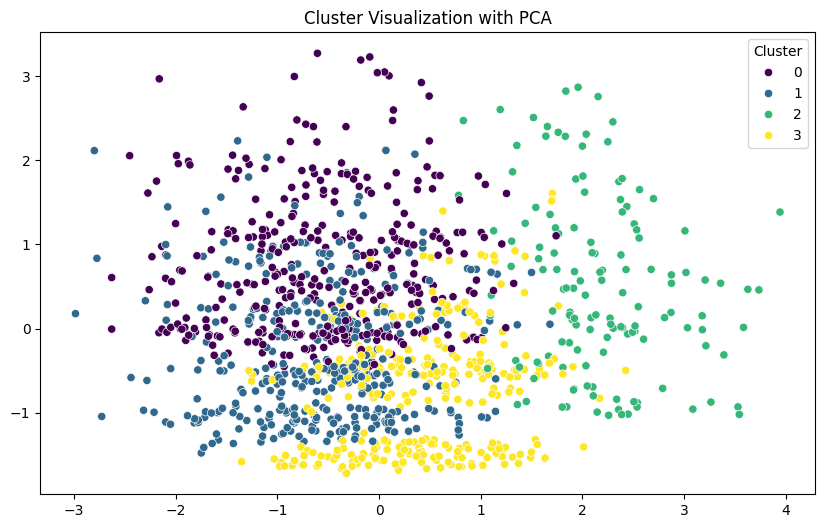

In [ ]:
# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means with the optimal number of clusters found (say k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster info to your DataFrame
data['Cluster'] = clusters

# Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1], hue=data['Cluster'], palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.show()

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Performance:
Accuracy: 0.8284518828451883, Precision: 0.7972308977572136, Recall: 0.6429813372717508, F1 Score: 0.6807911256595206

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.91      0.88        70
           2       0.85      0.95      0.90        64
           3       0.81      0.86      0.83        49
           4       0.95      0.67      0.78        27
           5       0.62      0.53      0.57        19
           6       0.50      0.33      0.40         6
           7       1.00      0.25      0.40         4

    accuracy                           0.83       239
   macro avg       0.80      0.64      0.68       239
weighted avg       0.83      0.83      0.82       239



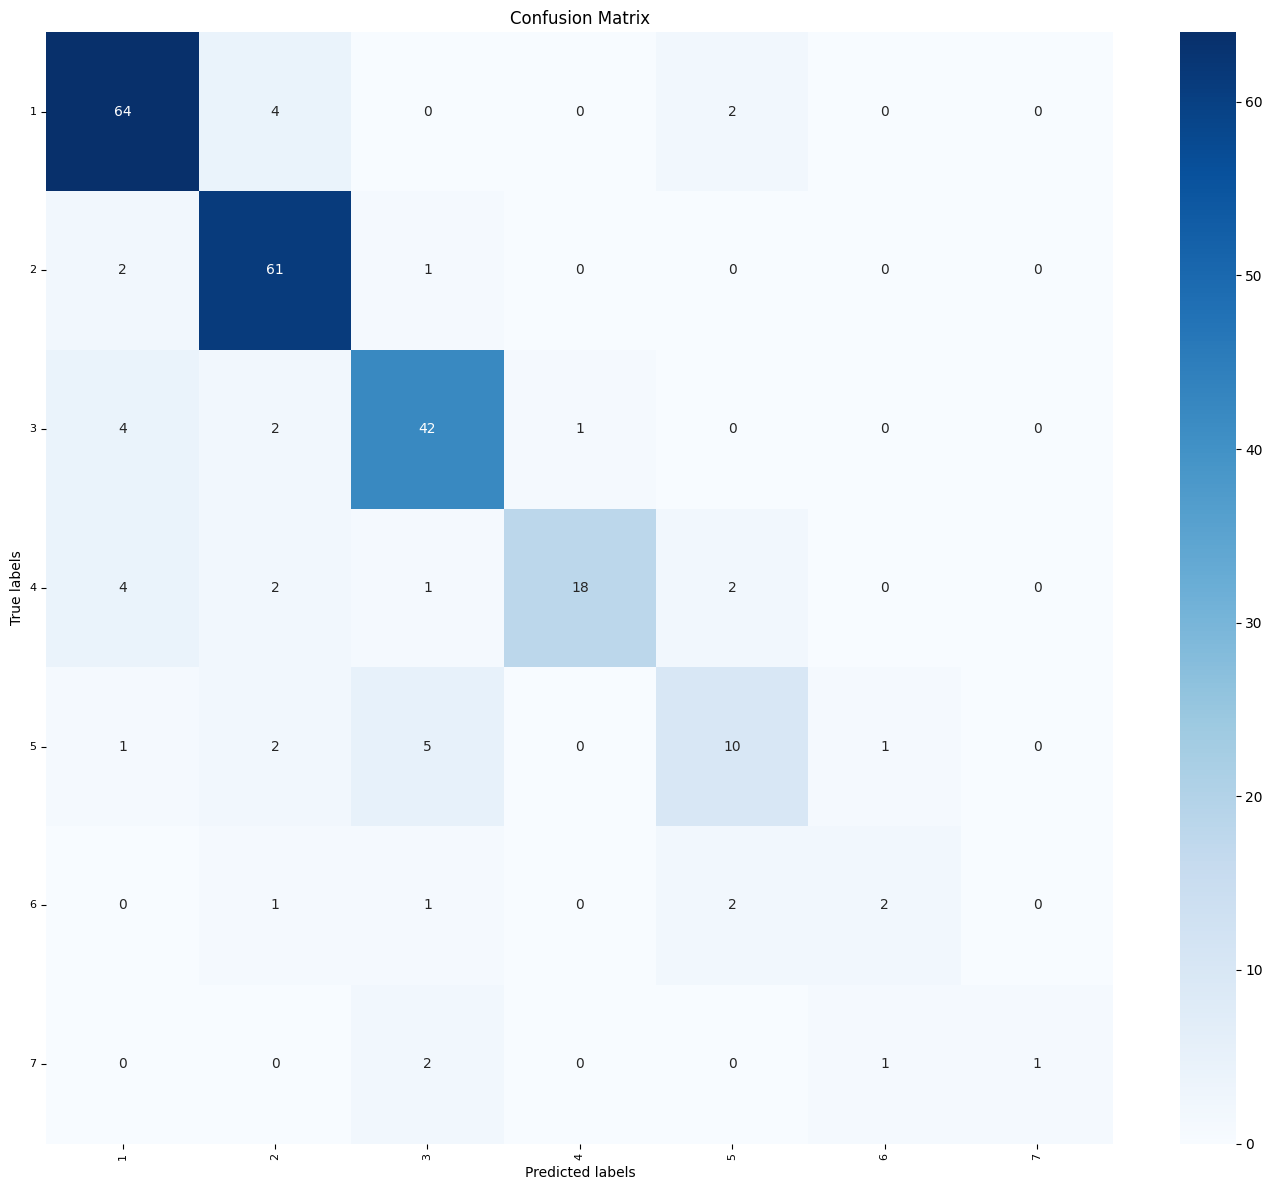

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training set score: 19.7479
Test set score: 82.8452
Cross-Validation Scores: [83.76963351 90.57591623 83.15789474 85.78947368 85.26315789]
Mean Value: 85.71121521080187


In [ ]:
rf_scaled = RandomForestClassifier(random_state=42)
rf_scaled.fit(X_train_scaled, y_train_scaled)
print("Random Forest Performance:")
evaluate_model(rf_scaled, X_test_scaled, y_test_scaled)

Gradient Boosting Performance:
Accuracy: 0.8117154811715481, Precision: 0.7764749735510643, Recall: 0.6461093386811702, F1 Score: 0.67505967268741

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.90      0.88        70
           2       0.84      0.95      0.89        64
           3       0.78      0.82      0.80        49
           4       0.81      0.63      0.71        27
           5       0.64      0.47      0.55        19
           6       0.50      0.50      0.50         6
           7       1.00      0.25      0.40         4

    accuracy                           0.81       239
   macro avg       0.78      0.65      0.68       239
weighted avg       0.81      0.81      0.80       239



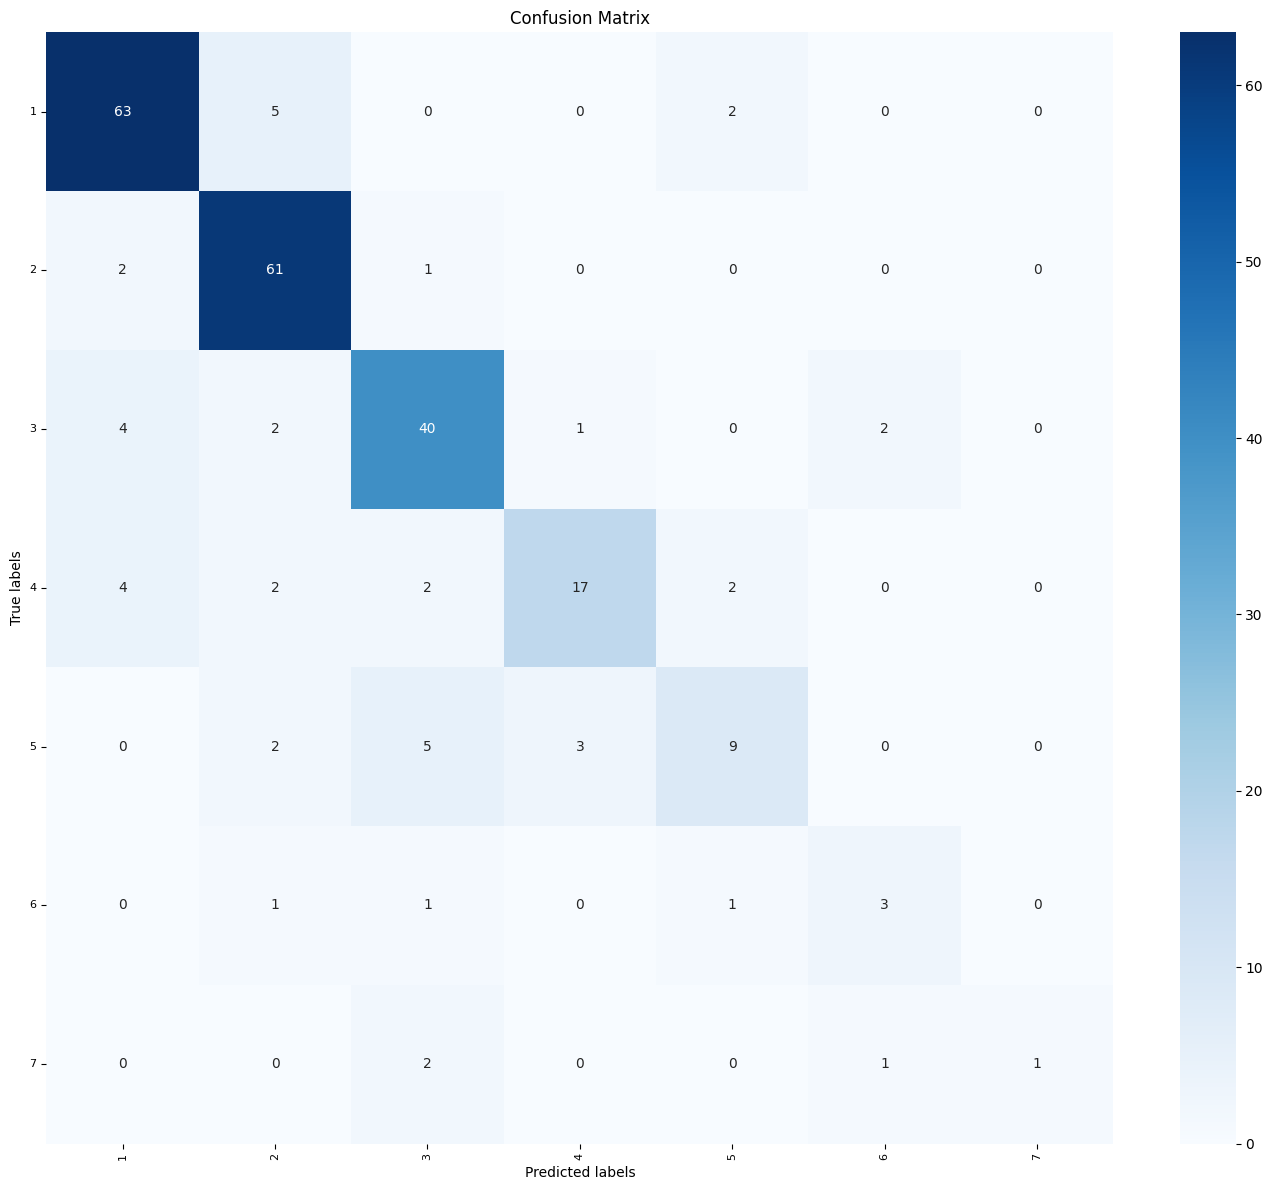

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Training set score: 16.8067
Test set score: 81.1715
Cross-Validation Scores: [83.2460733  89.0052356  84.21052632 86.31578947 84.21052632]
Mean Value: 85.39763020115736


In [ ]:
gb_scaled = GradientBoostingClassifier(random_state=42)
gb_scaled.fit(X_train_scaled, y_train_scaled)
print("Gradient Boosting Performance:")
evaluate_model(gb_scaled, X_test_scaled, y_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

Neural Network Performance:
Accuracy: 0.8368200836820083, Precision: 0.6704294397184711, Recall: 0.6022857775106701, F1 Score: 0.6223880949967907

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.99      0.92        70
           2       0.90      0.95      0.92        64
           3       0.78      0.88      0.83        49
           4       0.84      0.59      0.70        27
           5       0.64      0.47      0.55        19
           6       0.67      0.33      0.44         6
           7       0.00      0.00      0.00         4

    accuracy                           0.84       239
   macro avg       0.67      0.60      0.62       239
weighted avg       0.82      0.84      0.82       239



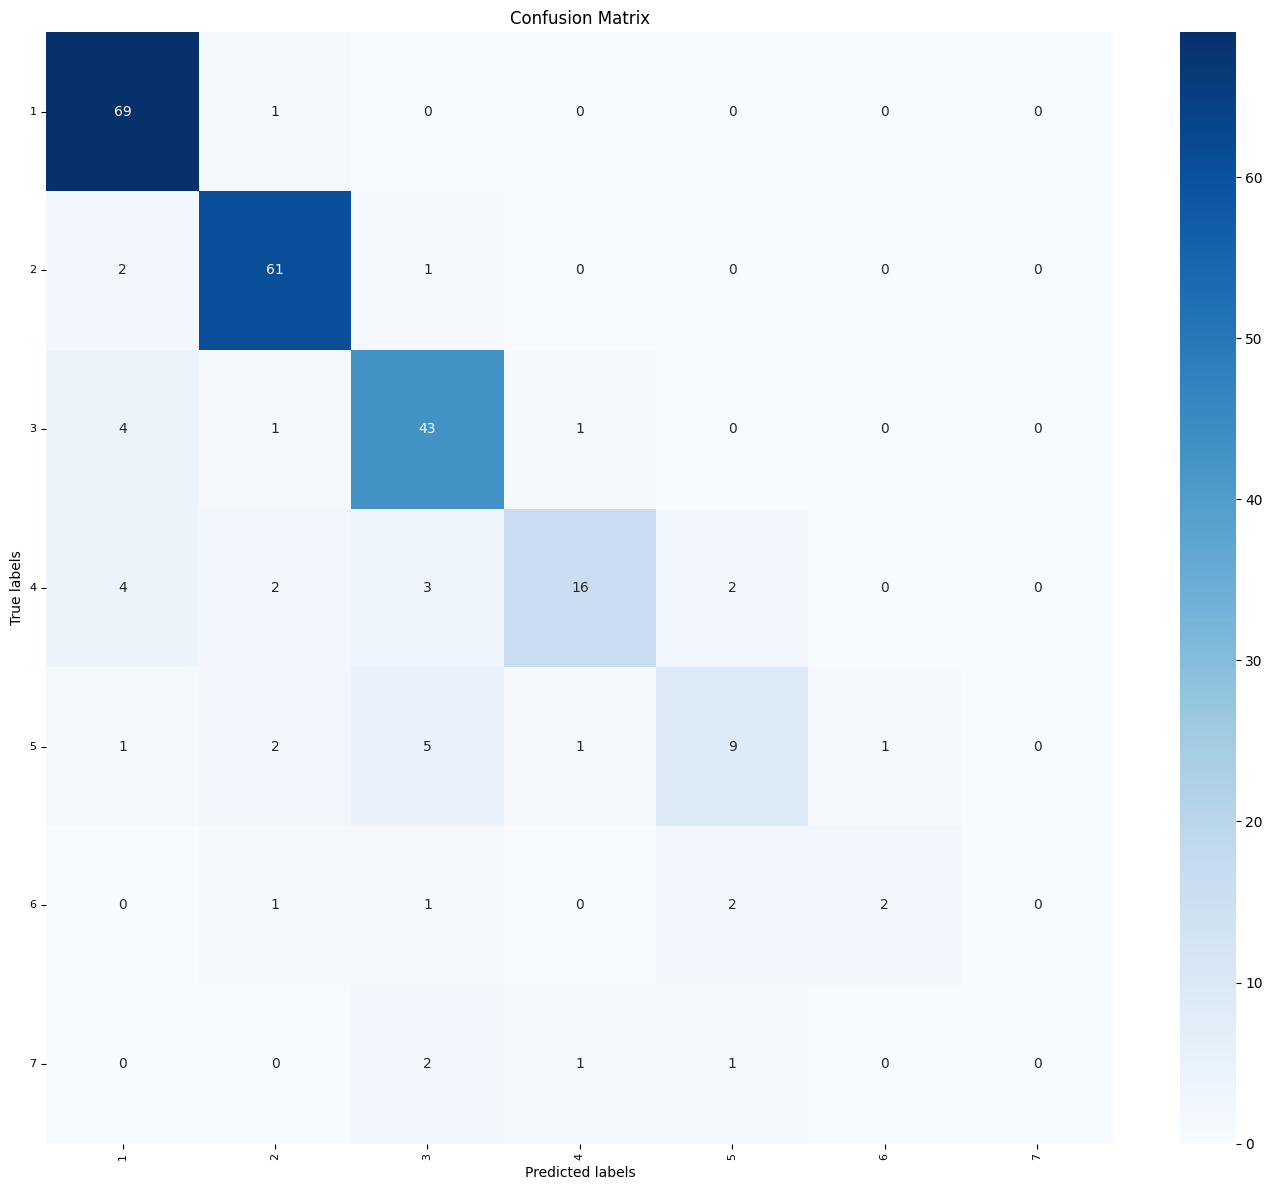

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Training set score: 22.8992
Test set score: 83.6820


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [68.06282723 71.20418848 64.21052632 74.21052632 70.52631579]
Mean Value: 69.64287682557179


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
nn_scaled = MLPClassifier(random_state=42)
nn_scaled.fit(X_train_scaled, y_train_scaled)
print("Neural Network Performance:")
evaluate_model(nn_scaled, X_test_scaled, y_test_scaled)

In [ ]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred = lr_scaled.predict(X_test_scaled)


mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = mean_squared_error(y_test_scaled, y_pred, squared=False)
r2 = r2_score(y_test_scaled, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.5737400545461205
Root Mean Squared Error: 0.8937019167476201
R-squared: 0.6321045021454488


In [ ]:
scalar2 = StandardScaler()
input_df = (20,0	,35.900	,0,	1	,3)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
# input_df_reshaped = scalar2.fit_transform(input_df_reshaped)
prediction = lr.predict(input_df_reshaped)
prediction_int = prediction.astype(int)
value = predictValue(prediction_int[0])
print("charges class is:",prediction_int[0])
print("charges are:",value)

charges class is: 4
charges are: 17936


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
